# Predicting Annual Salary of Customers

Here we predict annual salary of 100 customers using a dataset synthesized by ANZ Bank (available on theforage.com) containing 12043 transactions made by the customers between August and October 2018. The analysis uses numpy and pandas for data manipulation, matplotlib, seaborn and plotly for data visualisation and Scikit-Learn for building regression models.

# Exploratory Data Analysis
The aim of the exploratory data analysis is to extract insights on the average volume and spending segmented by transaction, by customer or by time. 


## Import libraries

In [631]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

## Import and clean dataset

In [481]:
# Import dataset
data = pd.read_excel('ANZ synthesised transaction dataset.xlsx')

In [482]:
# View dataset
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [483]:
# Check that no transaction is duplicated
print(data.duplicated().sum())

0


In [484]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [485]:
data.isna().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

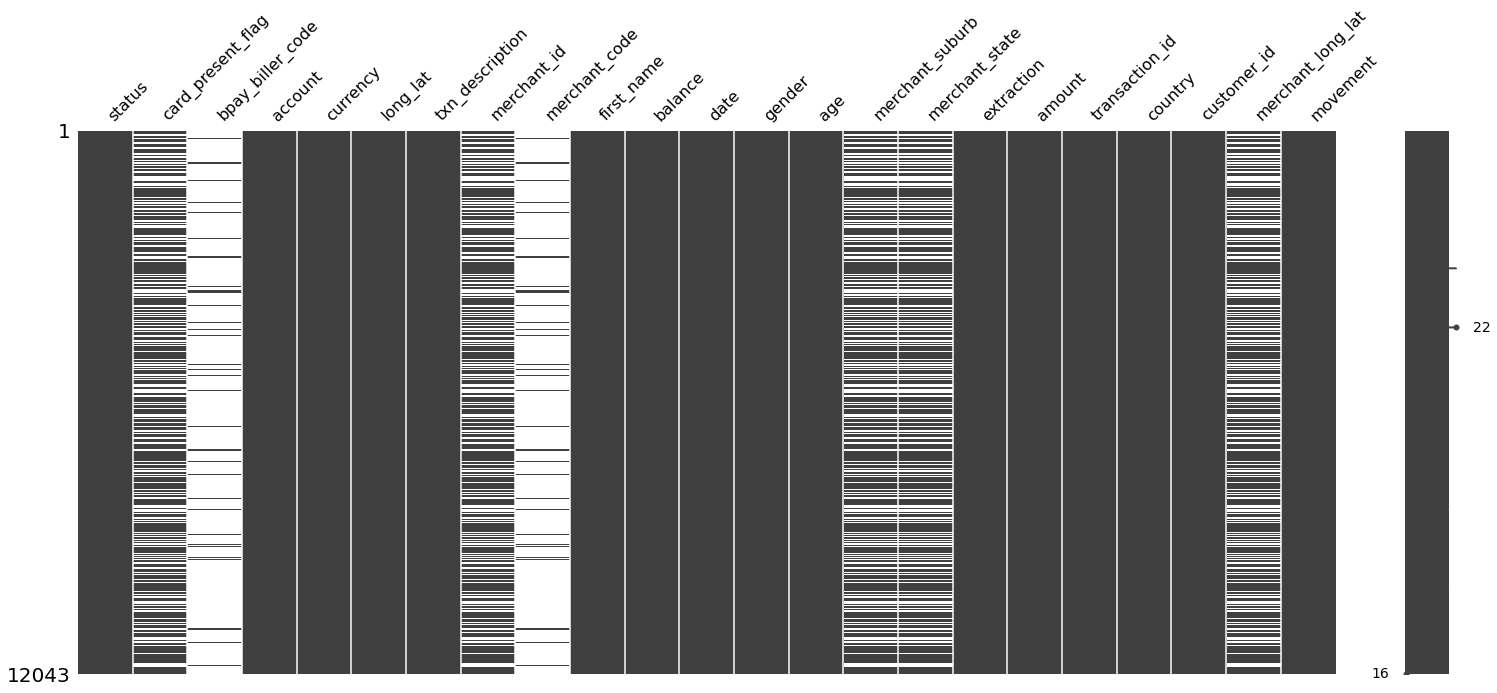

In [486]:
# Visualise missing data
missingno.matrix(data)
plt.show()

There are 23 features and 12043 entries in the dataset. 

Almost all of the bpay_biller_code and merchant_code columns are missing. These columns will be removed.

More than 1/3 of card_present_flag, merchant_id, merchant_suburb, merchant_state and merchant_long_lat columns contain missing values for the same transactions. We will keep these data for now.

In [487]:
# Remove bpay_biller_code and merchant_code columns
data = data.drop(columns = ['bpay_biller_code', 'merchant_code'], axis=1)

In [488]:
# Count number of unique values in categorical columns
nunique_values = {}
for column in data.columns:
   if data[column].dtype == 'O':
    nunique_values[column] = data[column].nunique()

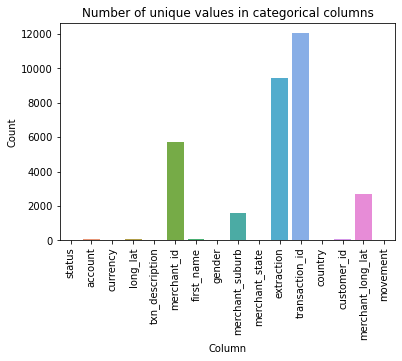

In [489]:
# Visualise number of unique values in categorical columns
nunique_values_series = pd.Series(nunique_values)
sns.barplot(x = nunique_values_series.index, y =nunique_values_series)
plt.title('Number of unique values in categorical columns')
plt.xlabel('Column')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

In [490]:
# Display number of unique values in categorical columns
nunique_values_series

status                   2
account                100
currency                 1
long_lat               100
txn_description          6
merchant_id           5725
first_name              80
gender                   2
merchant_suburb       1609
merchant_state           8
extraction            9442
transaction_id       12043
country                  1
customer_id            100
merchant_long_lat     2703
movement                 2
dtype: int64

Different customers may or may not share the same first name. The first_name column is not very insightful and it is sufficient to use the customer_id to identify each customer. We will remove the first_name column.

In [491]:
# Remove first_name column
data = data.drop(columns = ['first_name'], axis=1)

In [492]:
# View unique values in currency column
data.currency.unique()

array(['AUD'], dtype=object)

In [493]:
# View unique values in country column
data.country.unique()

array(['Australia'], dtype=object)

There is only one value "AUD" in the currency column and only one value "Australian" in the country column. We will remove the currency and country columns.

In [494]:
# Remove country and currency columns
data = data.drop(columns = ['country', 'currency'], axis=1)

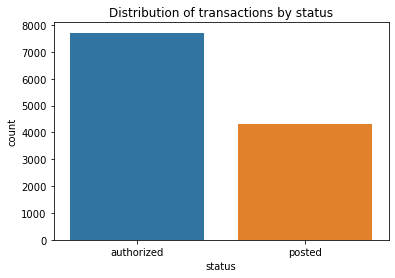

In [495]:
# Visualise distribution of transactions by status
sns.countplot(data = data, x = 'status')
plt.title('Distribution of transactions by status')
plt.show()

The number of authorized transactions were about twice as many as posted transactions.

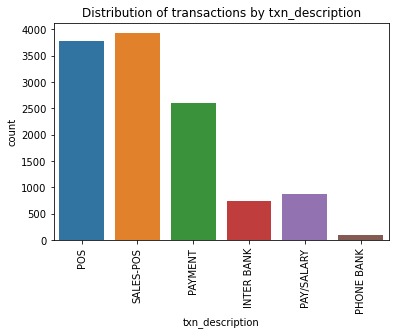

In [496]:
# Visualise distribution of transactions by txn_description
sns.countplot(data = data, x = 'txn_description')
plt.title('Distribution of transactions by txn_description')
plt.xticks(rotation=90)
plt.show()

There were significantly more transactions assocated with POS, SALES-POS or PAYMENT than INTERBANK, PAY/SALARY or PHONE BANK.

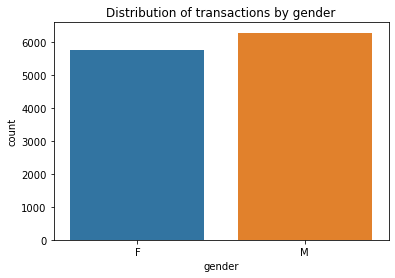

In [497]:
# Visualise distribution of transactions by gender
sns.countplot(data = data, x = 'gender')
plt.title('Distribution of transactions by gender')
plt.show() 

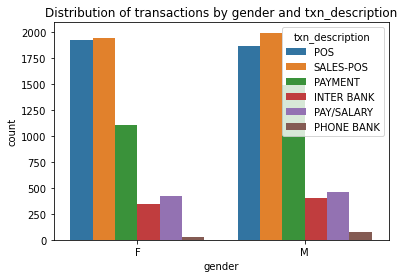

In [498]:
# Visualise distribution of transactions by gender and txn_description
sns.countplot(data = data, x = 'gender', hue = 'txn_description')
plt.title('Distribution of transactions by gender and txn_description')
plt.show() 

There were slightly more transactions associated with male. The distributions of types of transactions are similar for both genders.

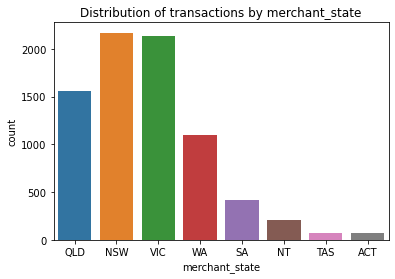

In [499]:
# Visualise distribution of transactions by merchant_state
sns.countplot(data = data, x = 'merchant_state')
plt.title('Distribution of transactions by merchant_state')
plt.show() 

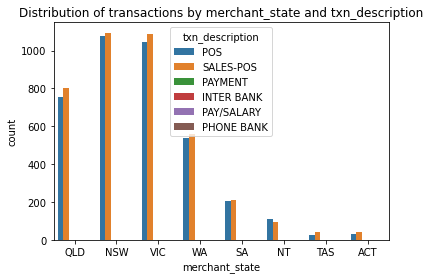

In [500]:
# Visualise distribution of transactions by merchant_state and txn_description
sns.countplot(data = data, x = 'merchant_state', hue = 'txn_description')
plt.title('Distribution of transactions by merchant_state and txn_description')
plt.show() 

There were more transactions in NSW and VIC than other states. Transactions in all states are domincated by POS and SALES-POS.

In [501]:
# Get the names of non-object columns
for column in data.columns:
    if data[column].dtype != 'O':
        print(column)

card_present_flag
balance
date
age
amount


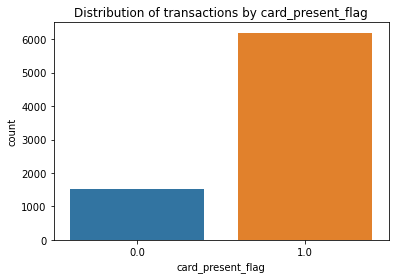

In [502]:
# Visualise distribution of transactions by card_present_flag
sns.countplot(data = data, x = 'card_present_flag')
plt.title('Distribution of transactions by card_present_flag')
plt.show() 

Without considering the nan values, there are a lot more transactions associated with card_present_flag. The 4326 nan values in card_present_flag column are likely to associate with the absence of card present flag.

In [503]:
# Assign zero value to nan values in card_present_flag column
data.fillna(value={"card_present_flag": 0}, inplace = True)

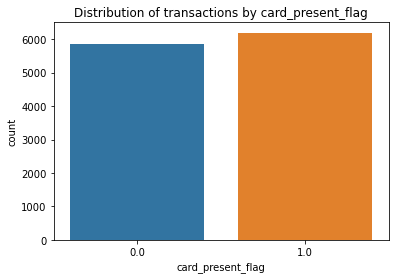

In [504]:
# Visualise distribution of transactions by card_present_flag after replacing nan by zero values
sns.countplot(data = data, x = 'card_present_flag')
plt.title('Distribution of transactions by card_present_flag')
plt.show() 

Assuming the nan values indicate absence of card, there were only slightly more transactions associated with card present flag.

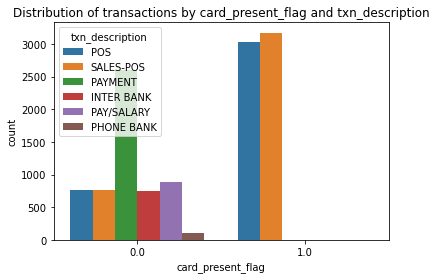

In [505]:
# Visualise distribution of transactions by card_present_flag and txn_description after replacing nan by zero values
sns.countplot(data = data, x = 'card_present_flag', hue = 'txn_description')
plt.title('Distribution of transactions by card_present_flag and txn_description')
plt.show() 

Most of the POS and SALES-POS transactions are associated with card present flag. All of PAYMENT, INTER BANK, PAY/SALARY and PHONE BANK do not associate with card present flag.

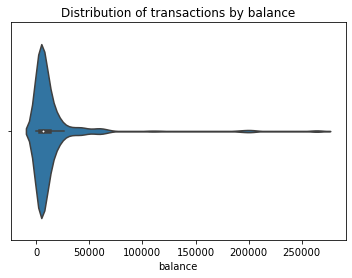

In [506]:
# Visualise distribution of transactions by balance 
sns.violinplot(data = data, x = 'balance')
plt.title('Distribution of transactions by balance')
plt.show() 

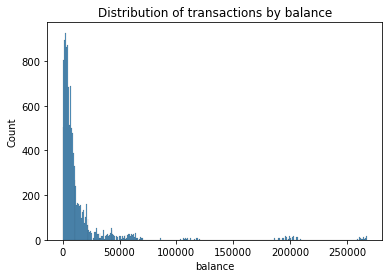

In [507]:
# Visualise distribution of transactions by balance 
sns.histplot(data = data, x = 'balance')
plt.title('Distribution of transactions by balance')
plt.show() 

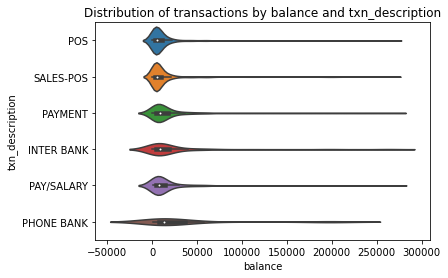

In [508]:
# Visualise distribution of transactions by balance and txn_description
sns.violinplot(data = data, x = 'balance', y ='txn_description')
plt.title('Distribution of transactions by balance and txn_description')
plt.show() 

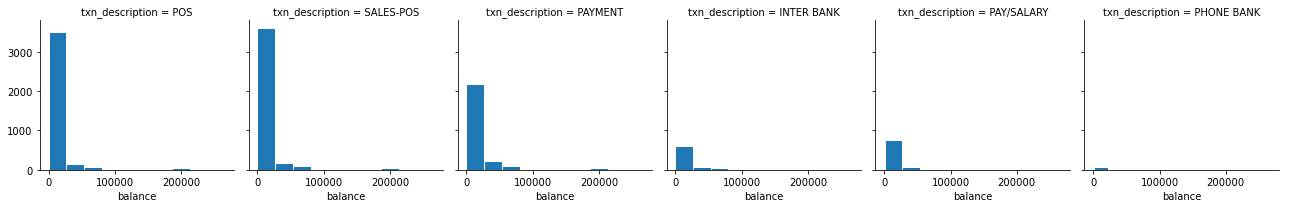

In [509]:
# Visualise distribution of transactions by balance and txn_description
g = sns.FacetGrid(data, col='txn_description')
g.map(plt.hist, 'balance', edgecolor='w').add_legend()
for ax in g.axes.flat:
    labels = ax.get_xticklabels()
    ax.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(3))
    ticks_loc = ax.get_xticks().tolist()
    ax.xaxis.set_major_locator(matplotlib.ticker.FixedLocator(ticks_loc))
plt.show()

Most of the transcations were associated with a balance below 10000 AUD. There were some outliers between 100000 and 300000 AUD in the POS, SALES-POS and PAYMENT categories. 

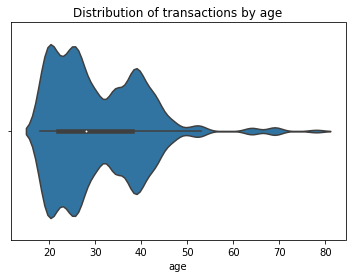

In [510]:
# Visualise distribution of transactions by age
sns.violinplot(data = data, x = 'age')
plt.title('Distribution of transactions by age')
plt.show() 

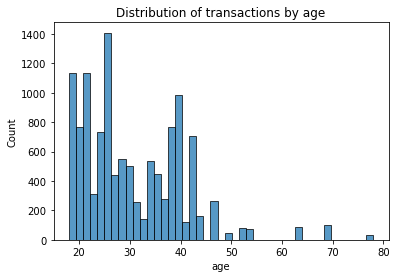

In [511]:
# Visualise distribution of transactions by age
sns.histplot(data = data, x = 'age')
plt.title('Distribution of transactions by age')
plt.show() 

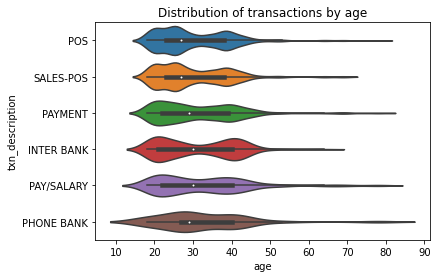

In [512]:
# Visualise distribution of transactions by age
sns.violinplot(data = data, x = 'age', y ='txn_description')
plt.title('Distribution of transactions by age')
plt.show() 

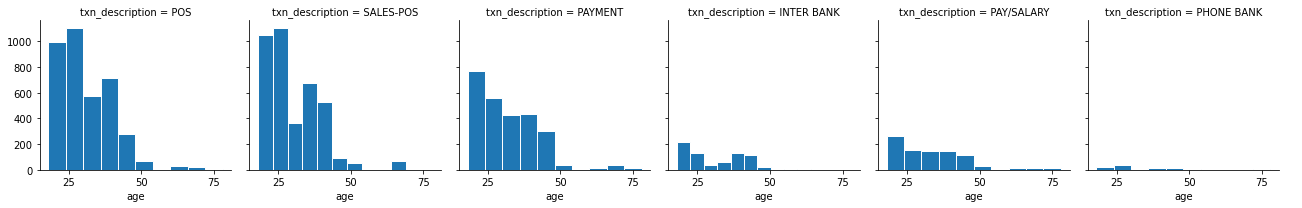

In [513]:
# Visualise distribution of transactions by age and txn_description
g = sns.FacetGrid(data, col='txn_description')
g.map(plt.hist, 'age', edgecolor='w').add_legend()
for ax in g.axes.flat:
    labels = ax.get_xticklabels()
    ax.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(3))
    ticks_loc = ax.get_xticks().tolist()
    ax.xaxis.set_major_locator(matplotlib.ticker.FixedLocator(ticks_loc))
plt.show()

Highest number of transactions are associated those betwen 20-30, followed by those around 40 years old. Transactions in POS and SALE-POS are dominated by customers aged 30 or below.

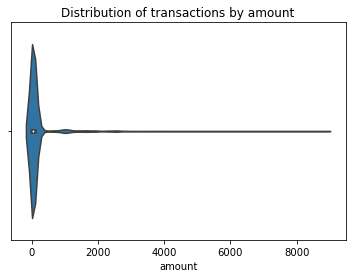

In [514]:
# Visualise distribution of transactions by amount
sns.violinplot(data = data, x = 'amount')
plt.title('Distribution of transactions by amount')
plt.show() 

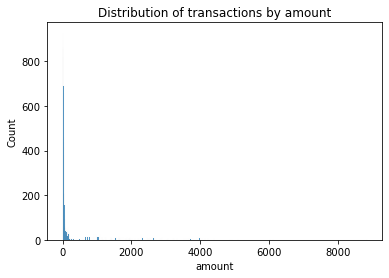

In [515]:
# Visualise distribution of transactions by amount
sns.histplot(data = data, x = 'amount')
plt.title('Distribution of transactions by amount')
plt.show() 

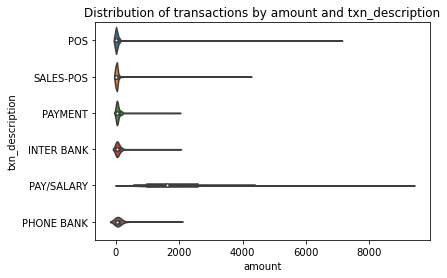

In [516]:
# Visualise distribution of transactions by amount and txn_description
sns.violinplot(data = data, x = 'amount', y ='txn_description')
plt.title('Distribution of transactions by amount and txn_description')
plt.show() 

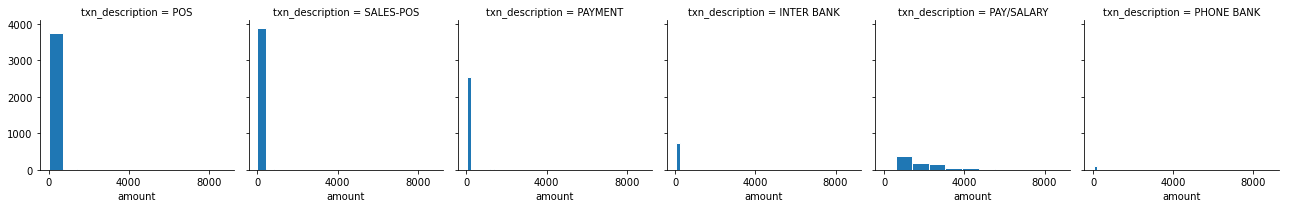

In [517]:
# Visualise distribution of transactions by amount and txn_description
g = sns.FacetGrid(data, col='txn_description')
g.map(plt.hist, 'amount', edgecolor='w').add_legend()
for ax in g.axes.flat:
    labels = ax.get_xticklabels()
    ax.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(3))
    ticks_loc = ax.get_xticks().tolist()
    ax.xaxis.set_major_locator(matplotlib.ticker.FixedLocator(ticks_loc))
plt.show()

Most of the transactions are below 500 AUD. PAY/SALARY transactions are associated with higher amount between 1000-3000 AUD.

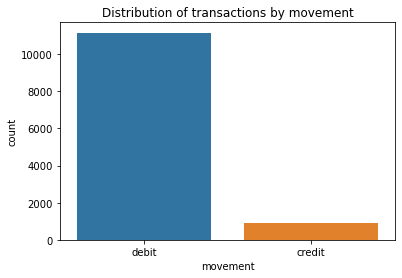

In [518]:
# Visualise distribution of transactions by movement
sns.countplot(data = data, x = 'movement')
plt.title('Distribution of transactions by movement')
plt.show() 

A significantly higher number of transactions are associated with debit instead of credit.

In [519]:
data.describe()

,card_present_flag,balance,age,amount
count,12043.000000,12043.000000,12043.000000,12043.000000
mean,0.514324,14704.195553,30.582330,187.933588
std,0.499816,31503.722652,10.046343,592.599934
min,0.000000,0.240000,18.000000,0.100000
25%,0.000000,3158.585000,22.000000,16.000000
50%,1.000000,6432.010000,28.000000,29.000000
75%,1.000000,12465.945000,38.000000,53.655000
max,1.000000,267128.520000,78.000000,8835.980000


## Segment transactions by time

### Number of transactions over time

In [520]:
np.min(data['date'])

Timestamp('2018-08-01 00:00:00')

In [521]:
np.max(data['date'])

Timestamp('2018-10-31 00:00:00')

The dates of transactions in the dataset were between 1 Aug and 31 October 2018.

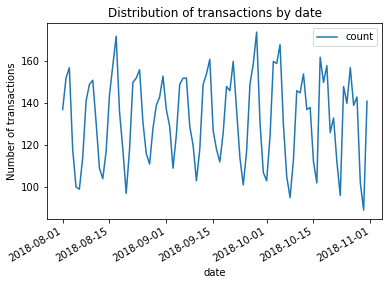

In [522]:
# Visualise number of transactions over time
data.groupby(['date']).transaction_id.agg(['count']).plot()
plt.title('Distribution of transactions by date')
plt.ylabel('Number of transactions')
plt.show()

There seem to be some seasonality in the number of transactions.

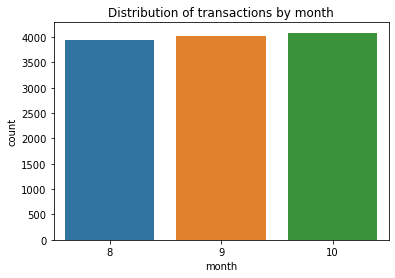

In [523]:
# Visualise distribution of transactions by month
data['month'] = data['date'].apply(lambda x: x.month)
sns.countplot(data = data, x = 'month')
plt.title('Distribution of transactions by month')
plt.show()

There were similar number of transactions in August, September and October 2018.

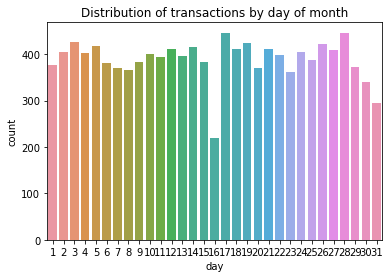

In [524]:
# Visualise distribution of transactions by day of month
data['day'] = data['date'].apply(lambda x: x.day)
sns.countplot(data = data, x = 'day')
plt.title('Distribution of transactions by day of month')
plt.show()

There are significantly fewer transactions on the 16th.

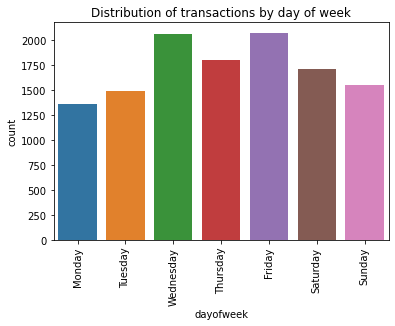

In [525]:
# Visualise distribution of transactions by day of week
data['dayofweek'] = data['date'].apply(lambda x: x.dayofweek)
sns.countplot(data = data, x = 'dayofweek')
plt.title('Distribution of transactions by day of week')
plt.xticks([0,1,2,3,4,5,6],['Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], rotation=90)
plt.show()

There are more transactions on Wednesday and Friday than other days of week.

### Amount of transactions over time

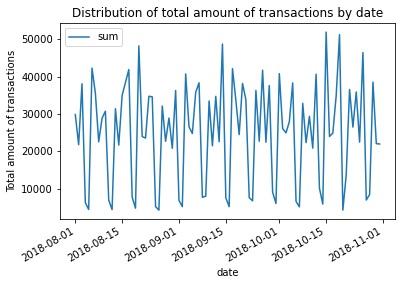

In [526]:
# Visualise amount of transactions over time
data.groupby(['date']).amount.agg(['sum']).plot()
plt.title('Distribution of total amount of transactions by date')
plt.ylabel('Total amount of transactions')
plt.show()

There appears some seasonality in the total amount of transactions.

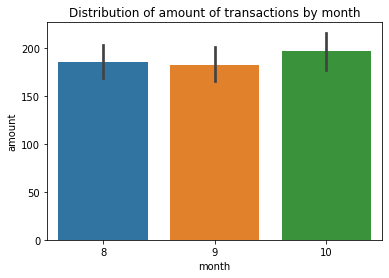

In [527]:
# Visualise distribution of amount of transactions by month
sns.barplot(data = data, x = 'month', y='amount')
plt.title('Distribution of amount of transactions by month')
plt.show()

There was a small increase in amount of transactions in October compared to August and September.

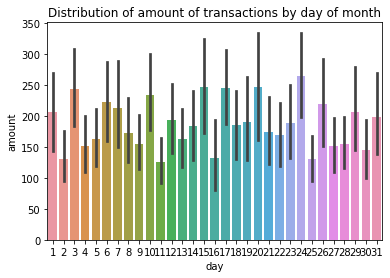

In [528]:
# Visualise distribution of amount of transactions by day of month
sns.barplot(data = data, x = 'day', y='amount')
plt.title('Distribution of amount of transactions by day of month')
plt.show()

The amount of transactions were lower on 2nd, 11th, 16th and 25th.

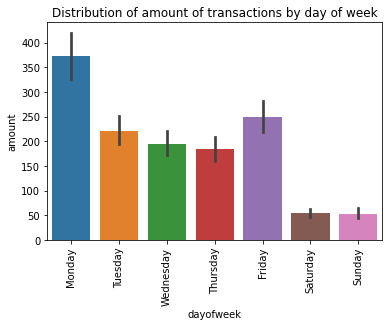

In [529]:
# Visualise distribution of amount of transactions by day of week
sns.barplot(data = data, x = 'dayofweek', y='amount')
plt.title('Distribution of amount of transactions by day of week')
plt.xticks([0,1,2,3,4,5,6],['Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], rotation=90)
plt.show()

The amount of the transactions on Monday was highest, whereas those on Saturday and Sunday were lowest.

## Segment transactions by customer

### Number of transactions per customer

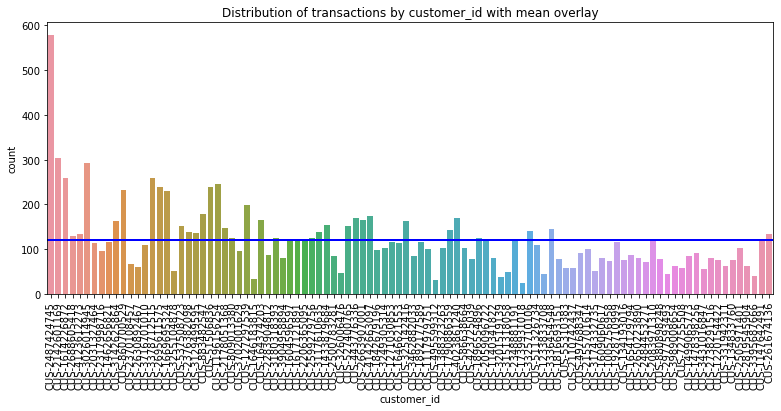

In [530]:
# Visualise distribution of transactions by customer_id with mean overlay
plt.figure(figsize=(13,5))
sns.countplot(data = data, x = 'customer_id')
plt.title('Distribution of transactions by customer_id with mean overlay')
plt.axhline(y=np.mean(data.groupby('customer_id').transaction_id.count()), color='b', linewidth=2)
plt.xticks(rotation = 90)
plt.show()

In [531]:
print('On average, each customer has %.0f transactions across the period.'%np.mean(data.groupby('customer_id').transaction_id.count()))

On average, each customer has 120 transactions across the period.


In [532]:
customers = pd.DataFrame(data[data.month == 8].groupby('customer_id'))[0]

In [533]:
max_number = np.max(data.groupby('customer_id').transaction_id.count())
max_customer = np.argmax(data.groupby('customer_id').transaction_id.count())
print('One customer %s did an unusually high number of %.0f transactions in the three-month period.'%(customers[max_customer],max_number))

One customer CUS-2487424745 did an unusually high number of 578 transactions in the three-month period.


In [534]:
print('Excluding this customer, on average each customer made %.0f transactions across the period.'%np.mean(data[data.customer_id != customers[max_customer]].groupby('customer_id').transaction_id.count()))

Excluding this customer, on average each customer made 116 transactions across the period.


In [535]:
# View all transactions made by customer CUS-2487424745
data[data.customer_id == 'CUS-2487424745']

,status,card_present_flag,account,long_lat,txn_description,merchant_id,balance,date,gender,age,...,merchant_state,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement,month,day,dayofweek
0,authorized,1.0,ACC-1598451071,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,35.39,2018-08-01,F,26,...,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,CUS-2487424745,153.38 -27.99,debit,8,1,2
1,authorized,0.0,ACC-1598451071,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,21.20,2018-08-01,F,26,...,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,CUS-2487424745,151.21 -33.87,debit,8,1,2
4,authorized,1.0,ACC-1598451071,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,17.95,2018-08-01,F,26,...,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,CUS-2487424745,153.44 -28.06,debit,8,1,2
20,authorized,1.0,ACC-1598451071,153.41 -27.95,POS,f2ef6270-cf91-409f-a6a2-fbd6735ea500,3.85,2018-08-01,F,26,...,NSW,2018-08-01T08:09:42.000+0000,14.10,1c12c9ad77894ef8b507fb091e41e928,CUS-2487424745,153.6 -28.63,debit,8,1,2
72,posted,0.0,ACC-1598451071,153.41 -27.95,PAY/SALARY,NaN,1017.52,2018-08-01,F,26,...,NaN,2018-08-01T14:00:00.000+0000,1013.67,a72c9dd8b4614a1982ff71f8b62677ad,CUS-2487424745,NaN,credit,8,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11990,authorized,0.0,ACC-1598451071,153.41 -27.95,SALES-POS,e4758c3b-e8d8-49bd-990a-a823a86dcabc,2236.44,2018-10-31,F,26,...,QLD,2018-10-31T15:38:20.000+0000,24.37,78fe3dcf051e47f88767ac7f4bb63f1b,CUS-2487424745,153.36 -28.07,debit,10,31,2
12013,authorized,1.0,ACC-1598451071,153.41 -27.95,SALES-POS,a074e4af-d785-465d-a813-4701cc355c78,2220.14,2018-10-31,F,26,...,QLD,2018-10-31T18:42:46.000+0000,16.30,db9aa7f3f1e44c6997376691b3d8d733,CUS-2487424745,153.02 -27.47,debit,10,31,2
12015,authorized,0.0,ACC-1598451071,153.41 -27.95,POS,e4758c3b-e8d8-49bd-990a-a823a86dcabc,2194.26,2018-10-31,F,26,...,QLD,2018-10-31T19:04:59.000+0000,25.88,bb90a98fdcbd40a69ad40a4fcd3971f6,CUS-2487424745,153.36 -28.07,debit,10,31,2
12017,authorized,1.0,ACC-1598451071,153.41 -27.95,POS,f951df7c-92b7-444c-959b-e227f5bb6735,2148.06,2018-10-31,F,26,...,NSW,2018-10-31T19:31:18.000+0000,46.20,362ee085d8794e1088f9906cde2aaa15,CUS-2487424745,151.05 -33.85,debit,10,31,2


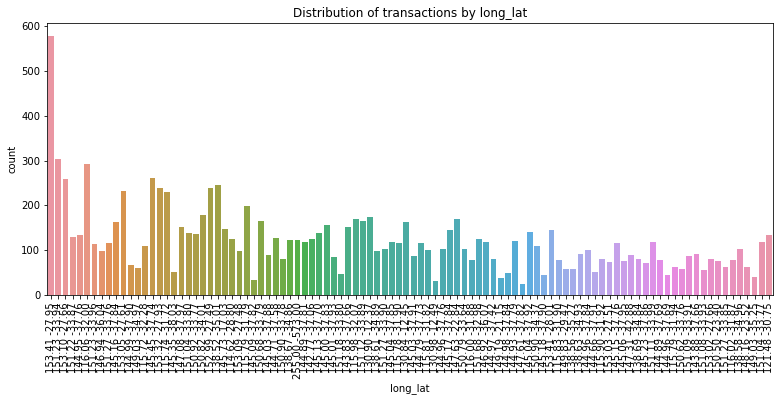

In [536]:
# Visualise distribution of transactions by long_lat
plt.figure(figsize=(13,5))
sns.countplot(data = data, x = 'long_lat')
plt.title('Distribution of transactions by long_lat')
plt.xticks(rotation = 90)
plt.show()

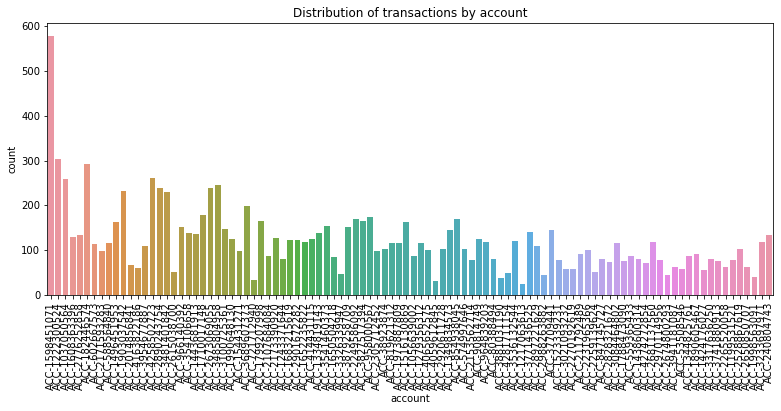

In [537]:
# Visualise distribution of transactions by account
plt.figure(figsize=(13,5))
sns.countplot(data = data, x = 'account')
plt.title('Distribution of transactions by account')
plt.xticks(rotation = 90)
plt.show()

The distribution of values in customer_id appears to match with those in account and long_lat columns. This indicates each customer has unique account and geographical location.

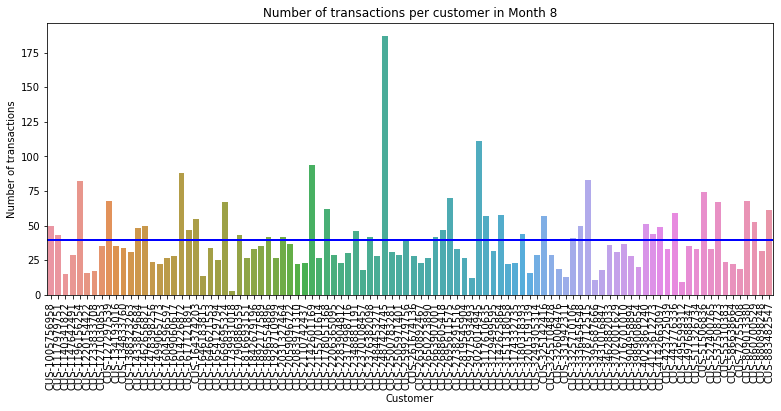

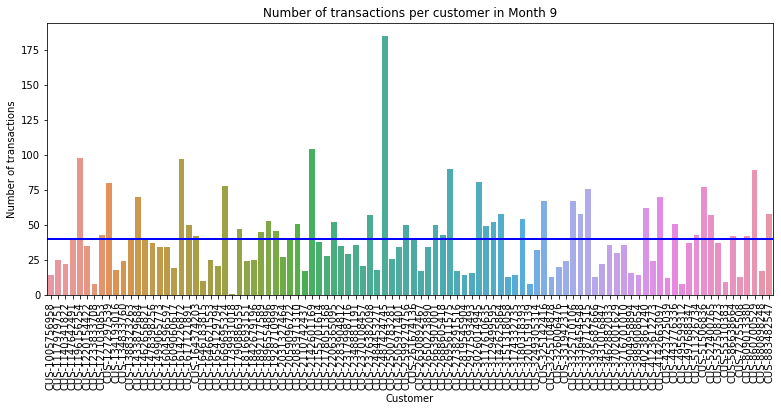

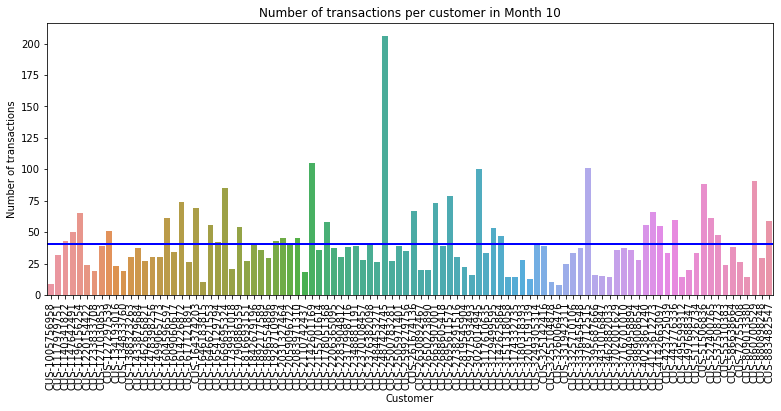

In [538]:
# Visualise number of transactions made by each customer in each month
for month in data.month.unique():
    per_customer_month = data[data.month == month].groupby('customer_id').transaction_id.count()
    by_customer_amount_series = pd.Series(per_customer_month)
    plt.figure(figsize=(13,5))
    sns.barplot(x = per_customer_month.index, y = per_customer_month)
    plt.title('Number of transactions per customer in Month %s'%month)
    plt.xlabel('Customer')
    plt.ylabel('Number of transactions')
    plt.xticks(rotation = 90)
    plt.axhline(y=np.mean(data[data.month == month].groupby('customer_id').transaction_id.count()), color='b', linewidth=2)
    plt.show()

In [539]:
per_customer_aug = np.array(data[data.month == 8].groupby('customer_id').transaction_id.count())

In [540]:
per_customer_sep = np.array(data[data.month == 9].groupby('customer_id').transaction_id.count())

In [541]:
per_customer_oct = np.array(data[data.month == 10].groupby('customer_id').transaction_id.count())

In [542]:
per_customer_change_sep = (per_customer_sep - per_customer_aug)/per_customer_aug*100

In [543]:
per_customer_change_oct = (per_customer_oct - per_customer_sep)/per_customer_sep*100

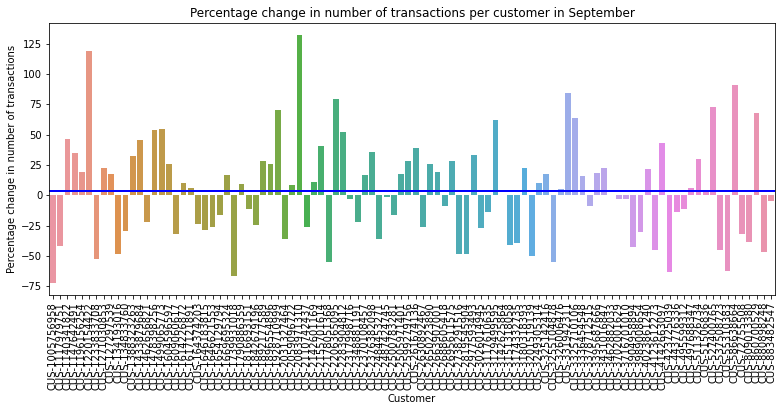

In [544]:
# Visualise percentage change in number of transactions per customer in September
per_customer_change_sep_series = pd.Series(per_customer_change_sep)
plt.figure(figsize=(13,5))
sns.barplot(x = per_customer_change_sep_series.index, y=per_customer_change_sep_series)
plt.title('Percentage change in number of transactions per customer in September')
plt.xlabel('Customer')
plt.ylabel('Percentage change in number of transactions')
plt.xticks(range(100), customers, rotation = 90)
plt.axhline(y=np.mean(per_customer_change_sep), color='b', linewidth=2)
plt.show()

In [545]:
print('The percentage change in number of transactions made by each customer in September was %.0f%% on average.'%np.mean(per_customer_change_sep))

The percentage change in number of transactions made by each customer in September was 4% on average.


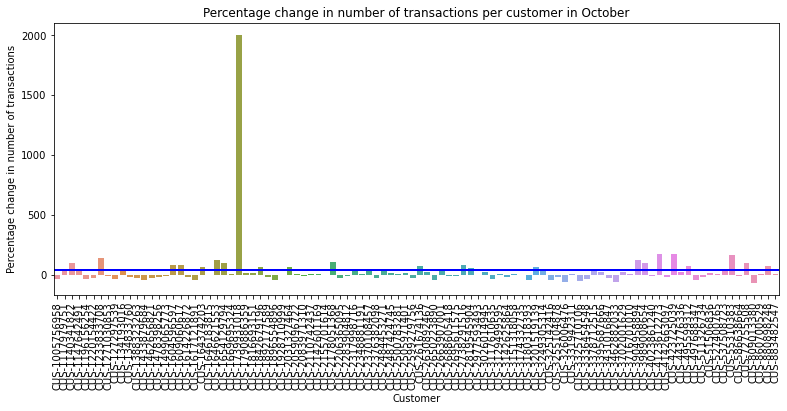

In [546]:
# Visualise percentage change in number of transactions per customer in October
per_customer_change_oct_series = pd.Series(per_customer_change_oct)
plt.figure(figsize=(13,5))
sns.barplot(x = per_customer_change_oct_series.index, y=per_customer_change_oct_series)
plt.title('Percentage change in number of transactions per customer in October')
plt.xlabel('Customer')
plt.ylabel('Percentage change in number of transactions')
plt.xticks(range(100), customers, rotation = 90)
plt.axhline(y=np.mean(per_customer_change_oct), color='b', linewidth=2)
plt.show()

In [547]:
print('The percentage change in number of transactions made by each customer in October was %.0f%% on average.'%np.mean(per_customer_change_oct))

The percentage change in number of transactions made by each customer in October was 35% on average.


In [548]:
max_change = np.max(per_customer_change_oct)
max_change_customer = np.argmax(per_customer_change_oct)
print('The number of transactions made by each customer appears quite similar across the three months except for one customer %s, who had %.0f%% change in transactions in October.'%(customers[max_change_customer], max_change))

The number of transactions made by each customer appears quite similar across the three months except for one customer CUS-1739931018, who had 2000% change in transactions in October.


In [549]:
# View all transactions made by customer CUS-1739931018
data[data.customer_id == 'CUS-1739931018']

,status,card_present_flag,account,long_lat,txn_description,merchant_id,balance,date,gender,age,...,merchant_state,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement,month,day,dayofweek
127,authorized,1.0,ACC-1217063613,147.61 -37.82,SALES-POS,92495e0a-61df-4c3d-9e2d-083ef2efed00,34.97,2018-08-01,F,27,...,VIC,2018-08-01T21:01:28.000+0000,7.29,3067a11e2cee4f2a97e4974249bbebb7,CUS-1739931018,144.84 -37.67,debit,8,1,2
761,posted,0.0,ACC-1217063613,147.61 -37.82,INTER BANK,NaN,14.97,2018-08-06,F,27,...,NaN,2018-08-06T23:00:00.000+0000,20.00,643701e7d40b4c97a1f091d7bea890be,CUS-1739931018,NaN,debit,8,6,0
792,authorized,1.0,ACC-1217063613,147.61 -37.82,POS,a39e17e7-8ca2-4a62-8ad7-6e7c841fc579,0.24,2018-08-07,F,27,...,VIC,2018-08-07T09:25:17.000+0000,14.73,38a2377f941d4504a96a8d6541d897d6,CUS-1739931018,144.41 -38.02,debit,8,7,1
7309,posted,0.0,ACC-1217063613,147.61 -37.82,PAY/SALARY,NaN,4863.86,2018-09-26,F,27,...,NaN,2018-09-26T13:00:00.000+0000,4863.62,8659baa692924427aefbf4077c5a9d67,CUS-1739931018,NaN,credit,9,26,2
8056,posted,0.0,ACC-1217063613,147.61 -37.82,INTER BANK,NaN,4843.86,2018-10-01,F,27,...,NaN,2018-10-01T23:00:00.000+0000,20.00,429e76b88ac54439a2f0ad6bef3627e1,CUS-1739931018,NaN,debit,10,1,0
8407,authorized,1.0,ACC-1217063613,147.61 -37.82,POS,66a0231a-2397-4bf1-ba73-5b8ec0b069b4,4828.48,2018-10-04,F,27,...,VIC,2018-10-04T11:39:03.000+0000,15.38,383837e5f63840cd87ed918eae1f1225,CUS-1739931018,145.03 -37.86,debit,10,4,3
8430,authorized,1.0,ACC-1217063613,147.61 -37.82,POS,49c35605-04d0-4fec-993d-de6bce1e4871,4808.93,2018-10-04,F,27,...,VIC,2018-10-04T14:38:26.000+0000,19.55,427bb57b3e9a4fb1aefcdb10d4b116ce,CUS-1739931018,145.16 -37.79,debit,10,4,3
8441,authorized,1.0,ACC-1217063613,147.61 -37.82,SALES-POS,b500a057-1d66-4769-b99a-b45163256045,4768.97,2018-10-04,F,27,...,VIC,2018-10-04T15:36:18.000+0000,39.96,f0f53902bd164688a9ee64fad6bfab93,CUS-1739931018,144.98 -37.8,debit,10,4,3
8475,authorized,1.0,ACC-1217063613,147.61 -37.82,SALES-POS,e1f6407e-16d6-4779-99b5-52ee31a6dad8,4756.99,2018-10-04,F,27,...,VIC,2018-10-04T19:34:05.000+0000,11.98,a721b1e4ce4e46d3babd3f1b06a9fd9a,CUS-1739931018,145.04 -37.8,debit,10,4,3
8618,posted,0.0,ACC-1217063613,147.61 -37.82,PAYMENT,NaN,4591.99,2018-10-05,F,27,...,NaN,2018-10-05T18:00:00.000+0000,165.00,be827c5c573442d19e8559f54f17aba2,CUS-1739931018,NaN,debit,10,5,4


The customer CUS-1739931018 had only one transaction in September but 20 transactions in October.

In [550]:
print('Excluding this customer, the percentage change in number of transactions in October per customer was %.0f%%.'%np.mean(per_customer_change_oct[per_customer_change_oct != max_change]))

Excluding this customer, the percentage change in number of transactions in October per customer was 15%.


### Amount of transactions per customer

In [551]:
by_customer_amount = data.groupby('customer_id').amount.sum()

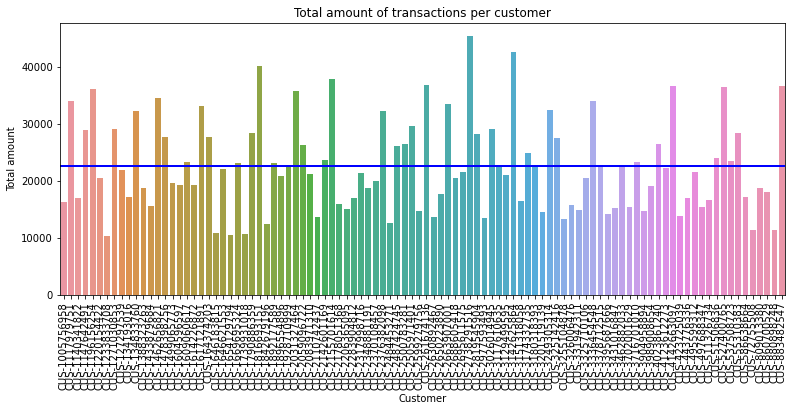

In [552]:
# Visualise total amount of transactions per customer
by_customer_amount_series = pd.Series(by_customer_amount)
plt.figure(figsize=(13,5))
sns.barplot(x = by_customer_amount_series.index, y = by_customer_amount_series)
plt.title('Total amount of transactions per customer')
plt.xlabel('Customer')
plt.ylabel('Total amount')
plt.xticks(rotation = 90)
plt.axhline(y=np.mean(data.groupby('customer_id').amount.sum()), color='b', linewidth=2)
plt.show()

In [553]:
print('On average, each customer makes a total amount of %.0f AUD in the transactions.'%np.mean(data.groupby('customer_id').amount.sum()))

On average, each customer makes a total amount of 22633 AUD in the transactions.


In [554]:
per_customer_amount_aug = np.array(data[data.month == 8].groupby('customer_id').amount.sum())

In [555]:
per_customer_amount_sep = np.array(data[data.month == 9].groupby('customer_id').amount.sum())

In [556]:
per_customer_amount_oct = np.array(data[data.month == 10].groupby('customer_id').amount.sum())

In [557]:
per_customer_change_amount_sep = (per_customer_amount_sep - per_customer_amount_aug)/per_customer_amount_aug*100

In [558]:
per_customer_change_amount_oct = (per_customer_amount_oct - per_customer_amount_sep)/per_customer_amount_sep*100

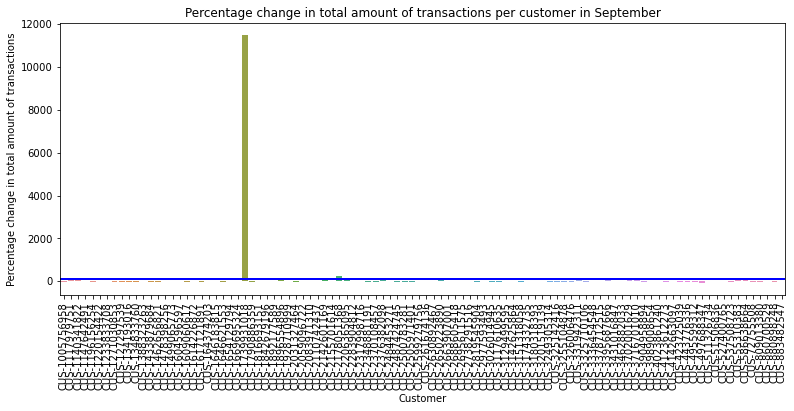

In [559]:
# Visualise percentage change in total amount of transactions per customer in September
per_customer_change_amount_sep_series = pd.Series(per_customer_change_amount_sep)
plt.figure(figsize=(13,5))
sns.barplot(x = per_customer_change_amount_sep_series.index, y=per_customer_change_amount_sep_series)
plt.title('Percentage change in total amount of transactions per customer in September')
plt.xlabel('Customer')
plt.ylabel('Percentage change in total amount of transactions')
plt.xticks(range(100), customers, rotation = 90)
plt.axhline(y=np.mean(per_customer_change_amount_sep), color='b', linewidth=2)
plt.show()

In [560]:
max_change_amount = np.max(per_customer_change_amount_sep)
max_change_amount_customer = np.argmax(per_customer_change_amount_sep)
print('The percentage change in total amount of transactions made by each customer appears negligible in September except for one customer %s, who had %.0f%% change in the amount.'%(customers[max_change_amount_customer], max_change_amount))

The percentage change in total amount of transactions made by each customer appears negligible in September except for one customer CUS-1739931018, who had 11475% change in the amount.


This same customer was identified to have increased from 1 to 20 transactions in October.

In [561]:
print('Excluding this customer, the percentage change in amount of transactions per customer in September was %.0f%%.'%np.mean(per_customer_change_amount_sep[per_customer_change_amount_sep != max_change_amount]))

Excluding this customer, the percentage change in amount of transactions per customer in September was 4%.


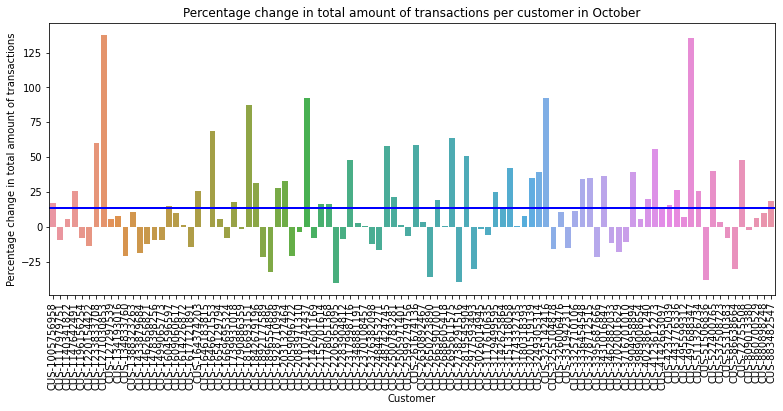

In [562]:
# Visualise percentage change in total amount of transactions per customer in October
per_customer_change_amount_oct_series = pd.Series(per_customer_change_amount_oct)
plt.figure(figsize=(13,5))
sns.barplot(x = per_customer_change_amount_oct_series.index, y=per_customer_change_amount_oct_series)
plt.title('Percentage change in total amount of transactions per customer in October')
plt.xlabel('Customer')
plt.ylabel('Percentage change in total amount of transactions')
plt.xticks(range(100), customers, rotation = 90)
plt.axhline(y=np.mean(per_customer_change_amount_oct), color='b', linewidth=2)
plt.show()

In [563]:
print('The percentage change in total amount of transactions made by each customer in October was %.0f%% on average.'%np.mean(per_customer_change_amount_oct))

The percentage change in total amount of transactions made by each customer in October was 13% on average.


### Location of each customer

In [564]:
# Separate long_lat into two columns longitude and lattitude
long_lat_series = data['long_lat'].str.split(' ')
data['longitude'] = long_lat_series.str.get(0)
data['latitude'] = long_lat_series.str.get(1)

In [565]:
# Check that no customer has more than one longitude
num_longitude_per_customer = data.groupby('customer_id').longitude.nunique()
num_longitude_per_customer[num_longitude_per_customer > 1].index

Index([], dtype='object', name='customer_id')

In [566]:
# Check that no customer has more than one latitude
num_latitude_per_customer = data.groupby('customer_id').latitude.nunique()
num_latitude_per_customer[num_latitude_per_customer > 1].index

Index([], dtype='object', name='customer_id')

In [567]:
# Extract customer_id, longitude and latitude
loc_data = data[['customer_id', 'longitude','latitude']]

In [568]:
loc_data.drop_duplicates().reset_index()

,index,customer_id,longitude,latitude
0,0,CUS-2487424745,153.41,-27.95
1,2,CUS-2142601169,151.23,-33.94
2,3,CUS-1614226872,153.10,-27.66
3,5,CUS-2688605418,151.22,-33.87
4,6,CUS-4123612273,144.95,-37.76
...,...,...,...,...
95,357,CUS-2505971401,138.58,-34.96
96,386,CUS-2819545904,148.16,-23.52
97,450,CUS-3395687666,149.03,-35.25
98,702,CUS-1147642491,151.04,-33.77


In [569]:
# Define bounding box
BBox = ((loc_data.longitude.min(), loc_data.longitude.max(), loc_data.latitude.min(), loc_data.latitude.max()))
BBox

('114.62', '255.00', '-12.37', '-573.00')

In [570]:
# Plot customer's locations on map

fig = go.Figure(data=go.Scattergeo(
        lon = loc_data['longitude'],
        lat = loc_data['latitude'],
        mode = 'markers'))

fig.update_layout(
        title = 'Geographical distribution of customers',
        geo_scope='world')
fig.show()

Most customers are located on the east coast of Australia.

## Preparing data for modelling

In [610]:
# Remove irrelevant columns
df = data.copy()
to_remove = ['account','status','card_present_flag','long_lat', 'merchant_id', 'merchant_suburb', 'merchant_state', 'extraction', 'transaction_id', 'merchant_long_lat', 'month', 'day', 'dayofweek']
df = df.drop(columns = to_remove, axis=1)

In [611]:
df.head()

,txn_description,balance,date,gender,age,amount,customer_id,movement,longitude,latitude
0,POS,35.39,2018-08-01,F,26,16.25,CUS-2487424745,debit,153.41,-27.95
1,SALES-POS,21.20,2018-08-01,F,26,14.19,CUS-2487424745,debit,153.41,-27.95
2,POS,5.71,2018-08-01,M,38,6.42,CUS-2142601169,debit,151.23,-33.94
3,SALES-POS,2117.22,2018-08-01,F,40,40.90,CUS-1614226872,debit,153.10,-27.66
4,SALES-POS,17.95,2018-08-01,F,26,3.25,CUS-2487424745,debit,153.41,-27.95


In [612]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   txn_description  12043 non-null  object        
 1   balance          12043 non-null  float64       
 2   date             12043 non-null  datetime64[ns]
 3   gender           12043 non-null  object        
 4   age              12043 non-null  int64         
 5   amount           12043 non-null  float64       
 6   customer_id      12043 non-null  object        
 7   movement         12043 non-null  object        
 8   longitude        12043 non-null  object        
 9   latitude         12043 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 941.0+ KB


In [613]:
# Estimate annual salary by multiplying salary transactions in the 3-month period by 4
salary = df[df.txn_description == 'PAY/SALARY'].groupby('customer_id').amount.agg('sum')*4

# Merge estimated annual salary to original DataFrame
df = pd.merge(left=df, right = salary, on='customer_id', how='outer')

# Remove salary transactions
df = df.loc[df.txn_description != 'PAY/SALARY']

# Rename the DataFrame columns 'amount_x' to 'amount' and 'amount_y' to 'salary'
df.rename(columns={'amount_x': 'amount', 'amount_y': 'salary'}, inplace=True)

In [614]:
# Calculate total amount in each category of txn_description
for item in ['POS', 'SALES-POS', 'PAYMENT', 'INTER BANK', 'PHONE BANK']:
    item_total = df[df.txn_description == item].groupby('customer_id').amount.agg('sum')
    df = pd.merge(left=df, right = item_total, on='customer_id', how='outer')
    new_col_name = item + '_amount'
    df.rename(columns={'amount_x': 'amount', 'amount_y': new_col_name}, inplace=True)
    df.fillna(0, inplace=True)

In [615]:
# Remove redundant txn_description column
df = df.drop(columns = ['txn_description'], axis=1)

In [616]:
# Calculate mean balance
balance_mean = df.groupby('customer_id').balance.agg('mean')
df = pd.merge(left=df, right = balance_mean, on='customer_id', how='outer')
df.rename(columns={'balance_x': 'balance', 'balance_y': 'balance_mean'}, inplace=True)

In [617]:
# Remove balance, date, movement and amount columns
df = df.drop(columns = ['balance', 'date', 'movement', 'amount'], axis=1)

In [618]:
# Encode the gender column
df['gender'] = df.gender.apply(lambda x: 0 if x=='F' else 1)

In [619]:
# Retain only one row per customer
df = df.drop_duplicates().reset_index(drop=True)

In [620]:
# Remove customer_id column
df = df.drop(columns = ['customer_id'], axis=1)

In [621]:
df

,gender,age,longitude,latitude,salary,POS_amount,SALES-POS_amount,PAYMENT_amount,INTER BANK_amount,PHONE BANK_amount,balance_mean
0,0,26,153.41,-27.95,56765.52,4830.97,4988.24,1665.0,536.0,0.0,1725.063759
1,1,38,151.23,-33.94,52110.76,6636.13,3049.63,983.0,0.0,0.0,1165.981724
2,0,40,153.10,-27.66,46388.68,3399.41,3445.86,844.0,0.0,0.0,3298.238780
3,1,20,151.22,-33.87,55687.20,1207.24,2902.20,1682.0,837.0,0.0,5534.418618
4,0,43,144.95,-37.76,59810.24,2815.62,2124.94,1828.0,591.0,0.0,5210.560250
...,...,...,...,...,...,...,...,...,...,...,...
95,0,40,138.58,-34.96,101221.64,1123.78,1137.73,1917.0,228.0,0.0,11766.213034
96,1,42,148.16,-23.52,90475.28,973.96,1209.70,2196.0,1267.0,0.0,111056.677857
97,1,42,149.03,-35.25,42187.44,209.60,645.55,2337.0,477.0,0.0,16604.789706
98,0,34,151.04,-33.77,88992.28,2062.31,1823.44,2597.0,250.0,0.0,9060.001714


In [622]:
# Get summary statistics for numeric variables
df.describe()

,gender,age,salary,POS_amount,SALES-POS_amount,PAYMENT_amount,INTER BANK_amount,PHONE BANK_amount,balance_mean
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.560000,31.770000,67063.074000,1528.612400,1570.051100,2017.940000,643.310000,107.160000,17521.693418
std,0.498888,11.544254,26966.174864,1326.778588,1170.260281,1085.983982,748.564467,306.095308,35366.818513
min,0.000000,18.000000,28623.840000,19.760000,0.000000,338.000000,0.000000,0.000000,1165.981724
25%,0.000000,22.000000,46365.330000,648.880000,723.345000,1209.250000,0.000000,0.000000,4456.665478
50%,1.000000,29.500000,59253.940000,1216.495000,1359.540000,1808.000000,484.500000,0.000000,6873.780836
75%,1.000000,39.250000,85330.060000,1808.942500,2069.325000,2611.000000,903.750000,0.000000,12094.626260
max,1.000000,78.000000,141375.680000,8244.070000,5768.520000,5332.000000,3794.000000,1916.000000,263716.951639


[]

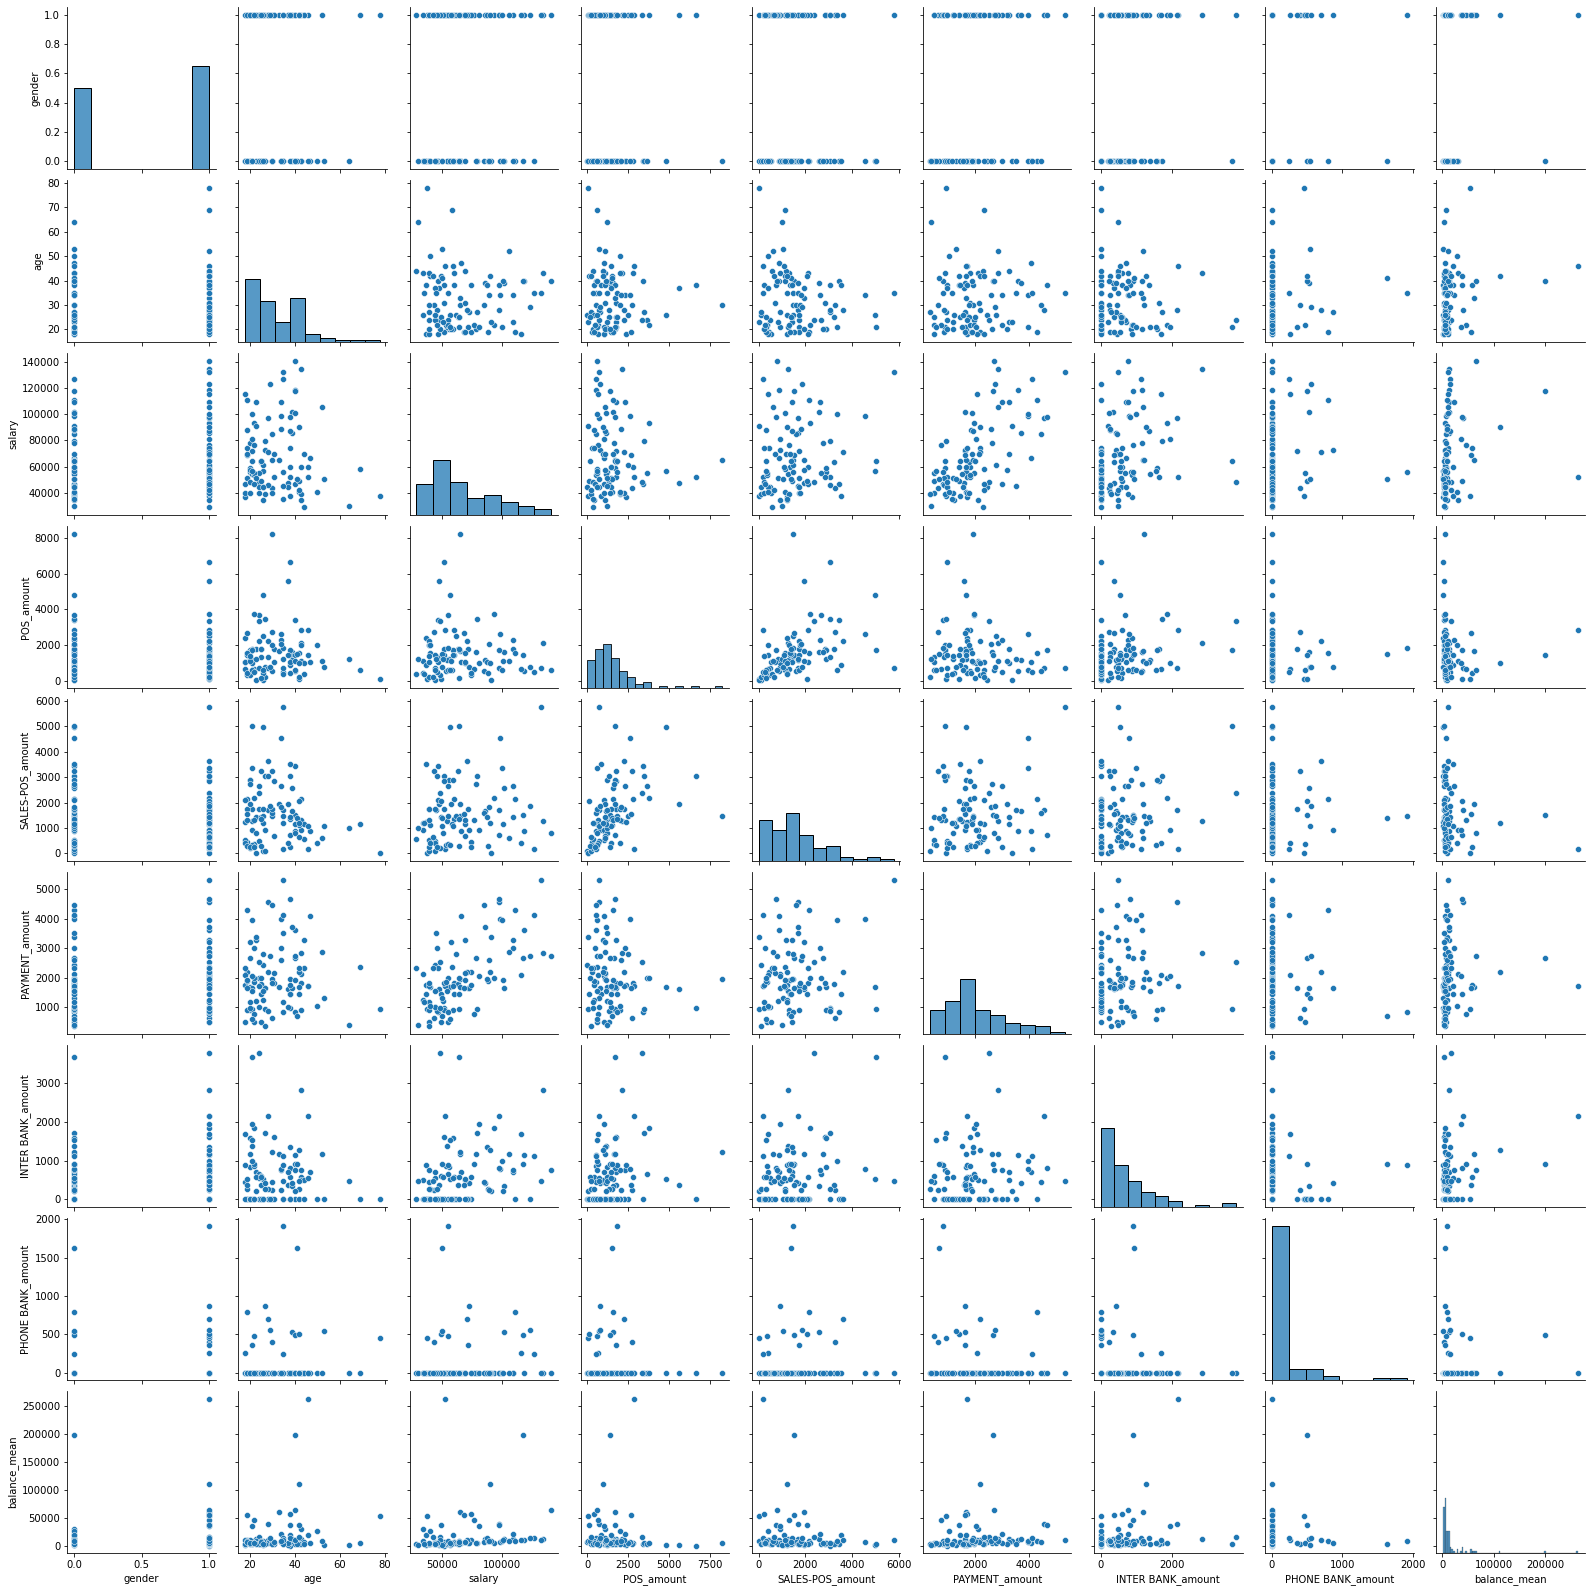

In [623]:
# Visualize pairwise correlation and distribution of numeric features
sns.pairplot(df, diag_kind='hist')
plt.plot()

In [624]:
# Check variance
print(df.var())

gender               2.488889e-01
age                  1.332698e+02
salary               7.271746e+08
POS_amount           1.760341e+06
SALES-POS_amount     1.369509e+06
PAYMENT_amount       1.179361e+06
INTER BANK_amount    5.603488e+05
PHONE BANK_amount    9.369434e+04
balance_mean         1.250812e+09
dtype: float64


The variables POS_amount, SALES-POS_amount, PAYMENT_amount, INTER BANK_amount, PHONE BANK_amount and balance_mean shows high variance. This can be resolved by applying log transformation.

In [625]:
# Apply log transformation
to_transform = ['POS_amount', 'SALES-POS_amount', 'PAYMENT_amount', 'INTER BANK_amount', 'PHONE BANK_amount',\
                'balance_mean']
for col in to_transform:
    new_col_name = col + '_log'
    df[new_col_name] = df[col].apply(lambda x: np.log(x+0.0001))

In [626]:
# Drop the original columns
df = df.drop(columns = to_transform, axis=1)

In [628]:
# Check variance again
print(df.var())

gender                   2.488889e-01
age                      1.332698e+02
salary                   7.271746e+08
POS_amount_log           9.714237e-01
SALES-POS_amount_log     3.558847e+00
PAYMENT_amount_log       3.450061e-01
INTER BANK_amount_log    5.536863e+01
PHONE BANK_amount_log    3.287674e+01
balance_mean_log         9.970401e-01
dtype: float64


<AxesSubplot:>

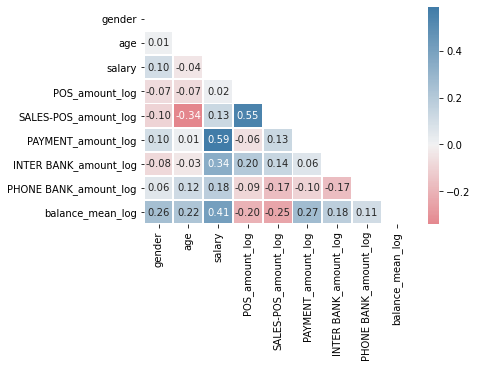

In [629]:
# Visualize Pearson correlation matrix
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool)) 
cmap = sns.diverging_palette(h_neg=10, h_pos=240, as_cmap=True)
sns.heatmap(df.corr(), mask=mask, center=0, cmap=cmap, linewidths=1, annot=True, fmt=".2f")

Salary shows strongest positive correlation with log of total payment amount.

In [632]:
# Divide data into training and test sets in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(df.loc[:,df.columns != 'salary'], df.salary,test_size=0.2, random_state=1)

In [633]:
# Apply Standard Scaling to numerical features
numeric_features = ['age', 'POS_amount_log', 'SALES-POS_amount_log', 'PAYMENT_amount_log', 'INTER BANK_amount_log', \
                    'PHONE BANK_amount_log', 'balance_mean_log']
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

## Compare Regression Models Using All Features

In [634]:
# Instantiate regression models
linear = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
svm = SVR(kernel='rbf')

In [635]:
# Create function that performs cross-validation and evaluates each regressor
def models_evaluation(X_train, y_train):
    
    # Use 'neg_mean_squared_error' as performance metric
    scoring = 'neg_mean_squared_error'
    
    # Perform cross-validation on each regressor
    cv_linear = cross_validate(linear, X_train, y_train, cv=5, scoring=scoring, return_train_score=True)
    cv_knn = cross_validate(knn, X_train, y_train, cv=5, scoring=scoring, return_train_score=True)
    cv_dt = cross_validate(dt, X_train, y_train, cv=5, scoring=scoring, return_train_score=True)
    cv_rf = cross_validate(rf, X_train, y_train, cv=5, scoring=scoring, return_train_score=True)
    cv_svm = cross_validate(svm, X_train, y_train, cv=5, scoring=scoring, return_train_score=True)
    
    # Create 'mean_scores_table' DataFrame with mean performance metric scores for each regressor
    mean_scores_table = pd.DataFrame({'Linear Regression':[cv_linear['test_score'].mean()],
                                       'K-Nearest Neighbor':[cv_knn['test_score'].mean()],
                                      'Decision Tree':[cv_dt['test_score'].mean()],
                                       'Random Forest':[cv_rf['test_score'].mean()],
                                       'Support Vector Machine':[cv_svm['test_score'].mean()]},
                                      index=['Negative Mean Squared Error'])
    
    # Add 'Best Score' column to 'mean_scores_table'
    mean_scores_table['Best Score'] = mean_scores_table.idxmax(axis=1)  

    # Create 'std_scores_table' DataFrame with standard deviation of performance metric scores for each regressor
    std_scores_table = pd.DataFrame({'Linear Regression':[cv_linear['test_score'].std()],
                                       'K-Nearest Neighbor':[cv_knn['test_score'].std()],
                                      'Decision Tree':[cv_dt['test_score'].std()],
                                       'Random Forest':[cv_rf['test_score'].std()],
                                       'Support Vector Machine':[cv_svm['test_score'].std()]},
                                      index=['Negative Mean Squared Error'])
   
    # Add 'Minimum standard deviation' column to 'std_scores_table'
    std_scores_table['Minimum standard deviation'] = std_scores_table.idxmin(axis=1)  

    # Return DataFrames with mean and standard deviation performance metrics scores for each regressor
    return mean_scores_table, std_scores_table
    
                                       
# Evaluate the regressors
mean_scores_table, std_scores_table = models_evaluation(X_train, y_train)

# Display the average accuracy
print(mean_scores_table)

# Display the standard deviations of cross-validation accuracy
print(std_scores_table)

                             Linear Regression  K-Nearest Neighbor  \
Negative Mean Squared Error      -9.892506e+08       -5.969353e+08   

                             Decision Tree  Random Forest  \
Negative Mean Squared Error  -5.250001e+08  -2.907377e+08   

                             Support Vector Machine     Best Score  
Negative Mean Squared Error           -8.439705e+08  Random Forest  
                             Linear Regression  K-Nearest Neighbor  \
Negative Mean Squared Error       1.146108e+09        7.262362e+07   

                             Decision Tree  Random Forest  \
Negative Mean Squared Error   2.258048e+08   9.516327e+07   

                             Support Vector Machine Minimum standard deviation  
Negative Mean Squared Error            3.197182e+08         K-Nearest Neighbor  


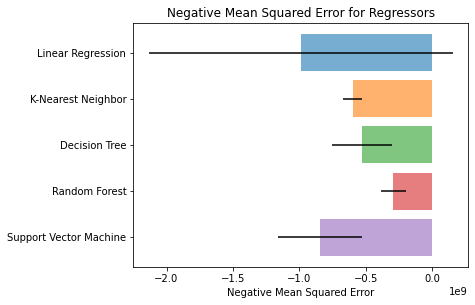

In [637]:
# Plot bar graphs that show mean and standard deviation of cross-validation accuracy of regressors
x_labels = ['Linear Regression',
            'K-Nearest Neighbor',
            'Decision Tree',
            'Random Forest',
            'Support Vector Machine']
n_bars = len(mean_scores_table.iloc[0,:-1])
xval = np.arange(n_bars)
ax = plt.figure(figsize = (6,26))
for k in range(len(mean_scores_table)):
   ax = plt.subplot(5,1,k+1)
   for j in xval:
      plt.barh([j], mean_scores_table.iloc[k,j], xerr=std_scores_table.iloc[k,j], alpha=0.6, align='center')
   plt.title('%s for Regressors'%mean_scores_table.index[k])
   plt.xlabel('%s'%mean_scores_table.index[k])
   ax.set_yticks(xval)
   ax.invert_yaxis()
   ax.set_yticklabels(x_labels)
plt.show()

Random Forest model provided the highest accuracy (lowest negative mean squared error), followed by decision tree and K-Nearest Neighbour.

## Feature engineering using Lasso Regression

In [638]:
# Instantiate Lasso regression model
lasso = Lasso(alpha=0.4, normalize=True)

In [639]:
# Fit Lasso regression model to data
lasso.fit(X_train, y_train)

Lasso(alpha=0.4, normalize=True)

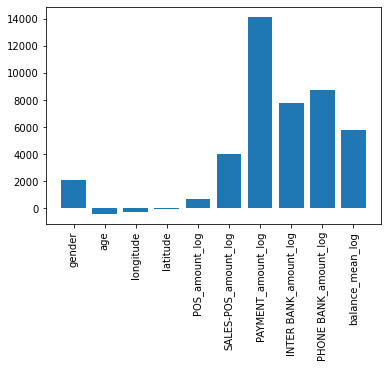

In [646]:
# Plot the coefficients
plt.bar(range(len(df.columns[df.columns != 'salary'])), lasso.coef_)
plt.xticks(range(len(df.columns[df.columns != 'salary'])), df.columns[df.columns != 'salary'].values, rotation=90)
plt.show()

In [645]:
# Print the coefficients
for col_name, coefficient in zip(df.columns[df.columns != 'salary'], lasso.coef_):
    print('%s: %.2f' %(col_name,coefficient))

gender: 2103.97
age: -458.55
longitude: -299.42
latitude: -94.47
POS_amount_log: 692.87
SALES-POS_amount_log: 3990.62
PAYMENT_amount_log: 14176.68
INTER BANK_amount_log: 7799.71
PHONE BANK_amount_log: 8721.59
balance_mean_log: 5802.27


We will remove 'age', 'longitude', 'latitude' and 'POS_amount_log' columns, which have small Lasso coefficients.

In [647]:
X_train_selected = X_train[['gender', 'SALES-POS_amount_log', 'PAYMENT_amount_log', 'INTER BANK_amount_log', \
                    'PHONE BANK_amount_log', 'balance_mean_log']]

# Evaluate the regressors
mean_scores_table, std_scores_table = models_evaluation(X_train_selected, y_train)

# Display the average accuracy
print(mean_scores_table)

# Display the standard deviations of cross-validation accuracy
print(std_scores_table)


                             Linear Regression  K-Nearest Neighbor  \
Negative Mean Squared Error      -3.877180e+08       -4.527862e+08   

                             Decision Tree  Random Forest  \
Negative Mean Squared Error  -4.975613e+08  -2.790357e+08   

                             Support Vector Machine     Best Score  
Negative Mean Squared Error           -8.437650e+08  Random Forest  
                             Linear Regression  K-Nearest Neighbor  \
Negative Mean Squared Error       8.481648e+07        5.745467e+07   

                             Decision Tree  Random Forest  \
Negative Mean Squared Error   2.218002e+08   1.048707e+08   

                             Support Vector Machine Minimum standard deviation  
Negative Mean Squared Error            3.196266e+08         K-Nearest Neighbor  


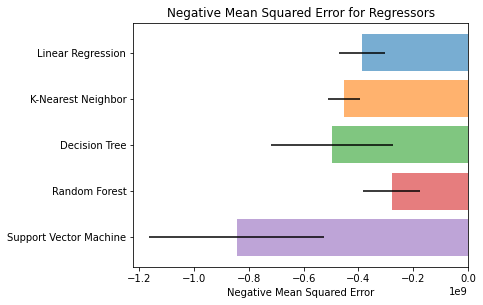

In [649]:
# Plot bar graphs that show mean and standard deviation of cross-validation accuracy of regressors
x_labels = ['Linear Regression',
            'K-Nearest Neighbor',
            'Decision Tree',
            'Random Forest',
            'Support Vector Machine']
n_bars = len(mean_scores_table.iloc[0,:-1])
xval = np.arange(n_bars)
ax = plt.figure(figsize = (6,26))
for k in range(len(mean_scores_table)):
   ax = plt.subplot(5,1,k+1)
   for j in xval:
      plt.barh([j], mean_scores_table.iloc[k,j], xerr=std_scores_table.iloc[k,j], alpha=0.6, align='center')
   plt.title('%s for Regressors'%mean_scores_table.index[k])
   plt.xlabel('%s'%mean_scores_table.index[k])
   ax.set_yticks(xval)
   ax.invert_yaxis()
   ax.set_yticklabels(x_labels)
plt.show()

The accuracy of Linear Regression and K-Nearest Neighbour algorithms increased, whereas there no significant change for the other algorithms. We will use only the selected features 'gender', 'SALES-POS_amount_log', 'PAYMENT_amount_log', 'INTER BANK_amount_log', 'PHONE BANK_amount_log', 'balance_mean_log' for building the optimal model.

In [664]:
X_test_selected = X_test[['gender', 'SALES-POS_amount_log', 'PAYMENT_amount_log', 'INTER BANK_amount_log', \
                    'PHONE BANK_amount_log', 'balance_mean_log']]

## Build Optimal Random Forest Model

In [661]:
# Define the range of hyperparameters for the search
rf_params = {'n_estimators':[50,100],'max_depth':[3,5,7,9],'min_samples_leaf':[3,5,7,9]}
randomizedsearch_rf = RandomizedSearchCV(estimator = rf, param_distributions=rf_params, n_iter=25, scoring='neg_mean_squared_error', cv=5, verbose=1, random_state =1)

In [662]:
# Perform Randomized Search
randomizedsearch_rf.fit(X_train_selected, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1),
                   n_iter=25,
                   param_distributions={'max_depth': [3, 5, 7, 9],
                                        'min_samples_leaf': [3, 5, 7, 9],
                                        'n_estimators': [50, 100]},
                   random_state=1, scoring='neg_mean_squared_error', verbose=1)

In [663]:
print("Best parameters: " , randomizedsearch_rf.best_params_)
print("Smallest Magnitude of Mean-Squared Error: ", randomizedsearch_rf.best_score_)

Best parameters:  {'n_estimators': 50, 'min_samples_leaf': 3, 'max_depth': 9}
Smallest Magnitude of Mean-Squared Error:  -275059727.68285763


In [689]:
# Develop final Random Forest model using best hyperparameters found
best_rf = RandomForestRegressor(n_estimators=50, min_samples_leaf=3, max_depth=9, random_state=1)
best_rf.fit(X_train_selected, y_train)
y_pred_train = best_rf.predict(X_train_selected)
mse_train = mean_squared_error(y_train, y_pred_train)
y_pred_test = best_rf.predict(X_test_selected)
mse_test = mean_squared_error(y_test, y_pred_test)
print('Train Mean-Squared Error: %.2f' % mse_train)
print('Train Root Mean-Squared Error: %.2f' % np.sqrt(mse_train))
print('Test Mean-Squared Error: %.2f' % mse_test)
print('Test Root Mean-Squared Error: %.2f' % np.sqrt(mse_test))

Train Mean-Squared Error: 92549497.53
Train Root Mean-Squared Error: 9620.26
Test Mean-Squared Error: 277359286.73
Test Root Mean-Squared Error: 16654.11


In [666]:
y_diff = y_pred_test - y_test
print('Mean salary difference: %.2f' %np.mean(np.abs(y_diff)))

Mean salary difference: 12857.17


In [686]:
print('Accuracy: %.02f' %best_rf.score(X_test_selected, y_test))

Accuracy: 0.55


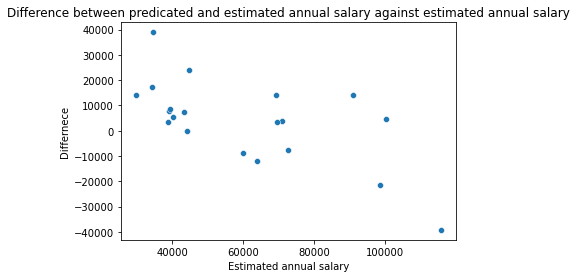

In [667]:
# Visualise the difference between salary predicted by the model from estimated annual salary
fig, ax = plt.subplots()
ax = sns.scatterplot(x = y_test, y = y_diff)
plt.ylabel('Differnece')
plt.xlabel('Estimated annual salary')
plt.title('Difference between predicated and estimated annual salary against estimated annual salary')
plt.show()

In [668]:
# Create a DataFrame with the feature importances
feature_importances = pd.DataFrame({"feature": list(X_train_selected.columns), "importance": best_rf.feature_importances_}).sort_values("importance", ascending=False)

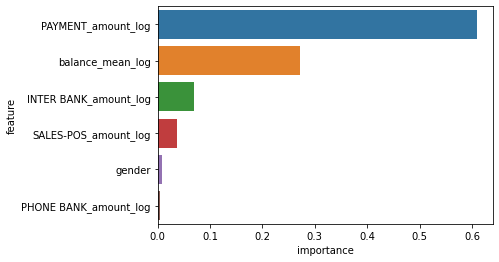

In [669]:
# Draw a horizontal barplot of importances_sorted
sns.barplot(data=feature_importances, x="importance", y="feature")
plt.show()

Feature importance analysis revealed log of total payment amount was the most importance feature for salary prediction, followed by log of mean balance, log of total inter-bank transaction amount and log of total SALES-POS transaction amount. 

Gender and log ot total PHONE BANK transaction amount appear to have negligible importance for the prediction of salary.

## Build Optimal Linear Regression Model

In [670]:
# Instantiate Linear regression model
linear = LinearRegression()

In [688]:
# Fit model to data
linear.fit(X_train_selected, y_train)
y_pred_train = linear.predict(X_train_selected)
mse_train = mean_squared_error(y_train, y_pred_train)
y_pred_test = linear.predict(X_test_selected)
mse_test = mean_squared_error(y_test, y_pred_test)
print('Train Mean-Squared Error: %.2f' % mse_train)
print('Train Root Mean-Squared Error: %.2f' % np.sqrt(mse_train))
print('Test Mean-Squared Error: %.2f' % mse_test)
print('Test Root Mean-Squared Error: %.2f' % np.sqrt(mse_test))

Train Mean-Squared Error: 318413762.27
Train Root Mean-Squared Error: 17844.15
Test Mean-Squared Error: 303605657.49
Test Root Mean-Squared Error: 17424.28


In [677]:
print("Coefficients: " , linear.coef_)
print("Intercept: ", linear.intercept_)

Coefficients:  [ 1885.96209941  4444.96484957 13769.59132158  8273.98352952
  8155.7737964   5903.83622403]
Intercept:  67729.79979283792


In [678]:
y_diff = y_pred_test - y_test
print('Mean salary difference: %.2f' %np.mean(np.abs(y_diff)))

Mean salary difference: 14183.19


In [687]:
print('Accuracy: %.02f' %linear.score(X_test_selected, y_test))

Accuracy: 0.51


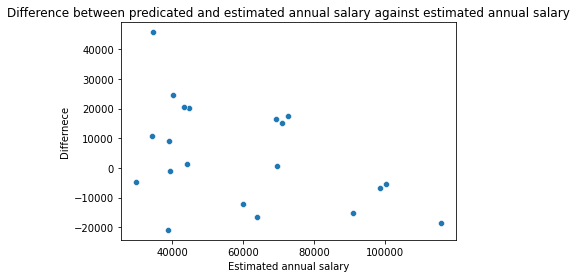

In [679]:
# Visualise the difference between salary predicted by the model from estimated annual salary
fig, ax = plt.subplots()
ax = sns.scatterplot(x = y_test, y = y_diff)
plt.ylabel('Differnece')
plt.xlabel('Estimated annual salary')
plt.title('Difference between predicated and estimated annual salary against estimated annual salary')
plt.show()

# Conclusion

We selected only six features, namely gender, log of total amount of SALES-POS transactions, log of total amount of payment transactions, log of total amount of inter-bank transactions, log of total amount of phone bank  transactions, and log of mean balance, for building the optimal models. The best model developed based on Random Forest algorithm was capable of predicting the annual salary of the customers within 12857.17 AUD on average and provided an accuracy of 55%. The second best model developed based on Linear Regression algorithm predicted the annual salary within 14183.19 AUD on average and provided an accuracy of 51%.

Feature importance analysis revealed log of total payment amount was the most importance feature for salary prediction, followed by log of mean balance, log of total inter-bank transaction amount and log of total SALES-POS transaction amount. Gender and log ot total PHONE BANK transaction amount appear to have negligible importance for the prediction of salary.